

---


**MACHINE LEARNING - CLUSTERING**

**SUBMISSION BY - ALAISSA SHAIKH**

---



In [ ]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
data = pd.read_csv("/content/USArrests.csv")

In [ ]:
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
data.shape

(50, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
#standardizing the data
features = data.columns[1:]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

This ensures that all features (range) contribute equally to the clustering process, leading to more accurate and reliable results.

In [ ]:
#determining optimal number of clusters for K-Means using the elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8



*   wcss: stores different number of clusters. It is calculated as the sum of squared distances between each point and the centroid of its cluster.

*   Elbow Method: The Elbow Method is used to determine the optimal number of clusters by plotting the WCSS against the number of clusters.





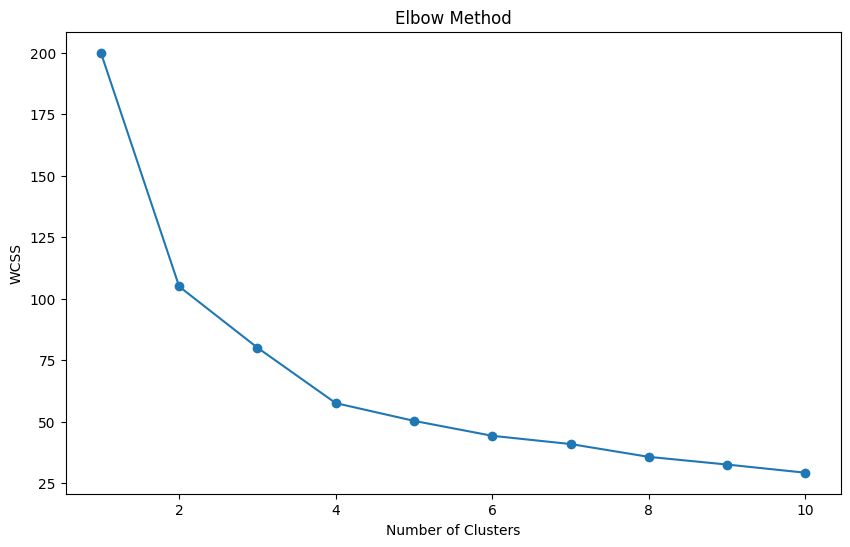

In [ ]:
#plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

!pip install --upgrade kneed

from kneed import KneeLocator

kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

cluster_cnt = kl.elbow

print('The Knee located at figure:', cluster_cnt)


In [ ]:
#applying K-Means Clustering
#kneed? : after wcss for elbow point detection
optimal_k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#performing hierarchical clustering
linked = linkage(data_scaled, method='ward')

The linkage matrix contains information about the distances between clusters and how they are merged at each step of the hierarchical clustering process.

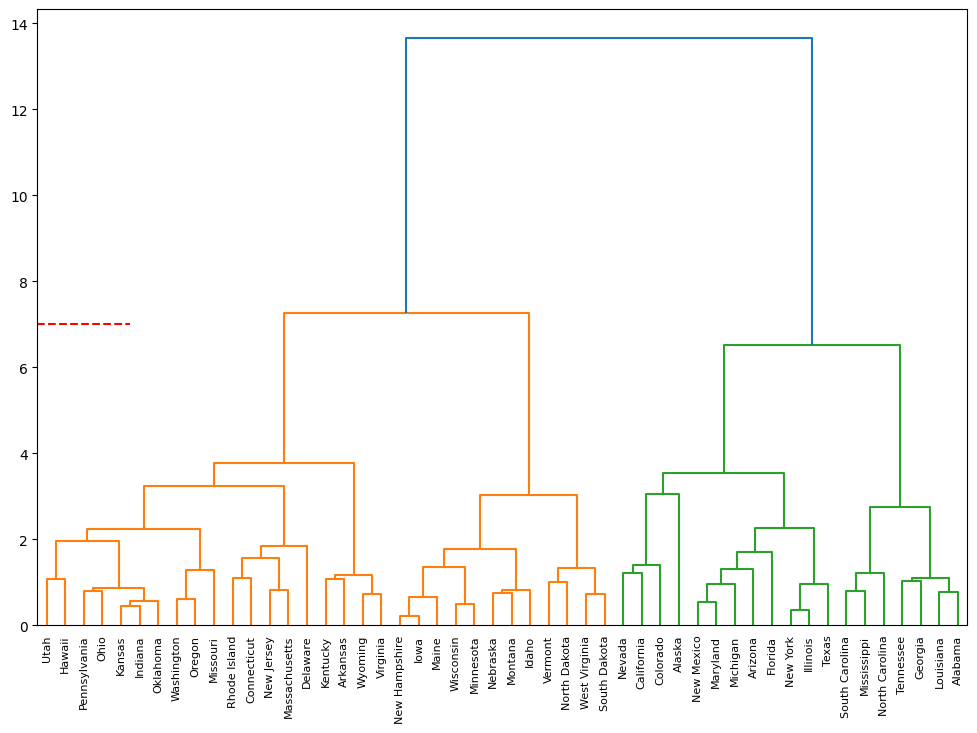

In [ ]:
#plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=data['States'].values, distance_sort='descending', show_leaf_counts=True)
plt.hlines(y=7, xmin=0, xmax=len(data_scaled), colors='r', linestyles='dashed')  # Assuming 4 clusters
plt.show()
#how the red line is plotted?


The dendrogram visualizes the hierarchical clustering process. It shows the order in which clusters are merged and the distances between clusters at each step.

In [ ]:
#assigning clusters from hierarchical clustering
data['Hierarchical_Cluster'] = fcluster(linked, 4, criterion='maxclust')
#fcluster?

In [ ]:
#displaying the cluster assignments
print(data[['States', 'KMeans_Cluster', 'Hierarchical_Cluster']].head())

       States  KMeans_Cluster  Hierarchical_Cluster
0     Alabama               1                     1
1      Alaska               2                     2
2     Arizona               2                     2
3    Arkansas               1                     4
4  California               2                     2


Consistent clustering by both methods indicates strong, clear patterns, while inconsistencies may highlight areas requiring further investigation.

In [ ]:
#analyzing the clusters
cluster_summary = data.groupby('KMeans_Cluster')[features].mean()

In [ ]:
#visualizing the clusters using a heatmap for cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_data = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=features)
cluster_centers_data['Cluster'] = range(1, 5)

The heatmap visualizes the average feature values of each cluster center, helping us compare and understand the characteristics of each cluster at a glance.

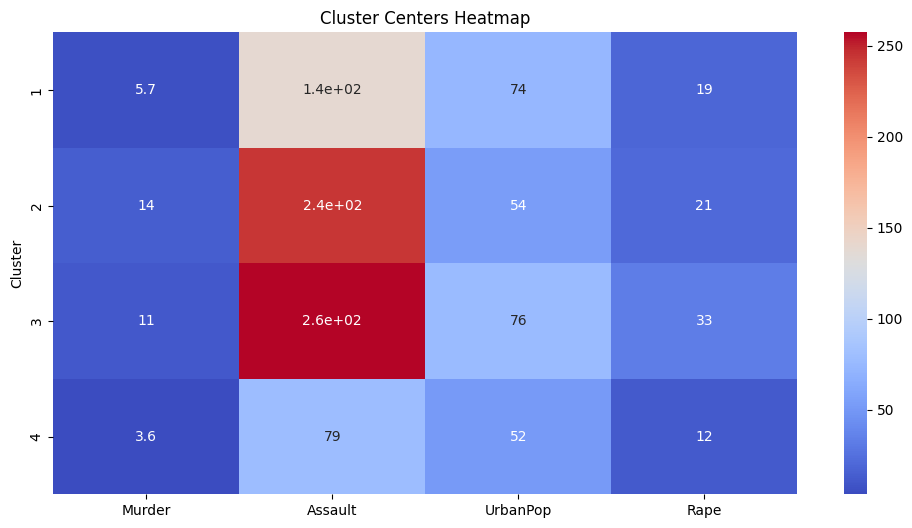

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers_data.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers Heatmap')
plt.show()



*   Cluster 1 - relatively lower values for Murder and Rape but moderate values for Assault and UrbanPop.

*   Cluster 2 - has high values for Murder and Assault, but lower values for UrbanPop. Rape values are slightly above average.

*   Cluster 3 - has high values for Murder, Assault, and Rape. UrbanPop is also moderately high.

*   Cluster 4 - has the lowest values for Murder, Assault, and Rape. UrbanPop is also relatively low.

